In [1]:
from mmdet3d.apis import inference_detector, init_model
from mmdet3d.registry import VISUALIZERS
from mmdet3d.utils import register_all_modules

/home/PJLAB/zhuchenming/mmdet3d_refactor/mmengine/mmengine/model/utils.py:800: UserWarning: Cannot import torch.fx, `merge_dict` is a simple function to merge multiple dicts
  warnings.warn('Cannot import torch.fx, `merge_dict` is a simple function '


In [2]:
# register all modules in mmdet3d into the registries
register_all_modules()

/home/PJLAB/zhuchenming/mmdet3d_refactor/mmdetection3d/mmdet3d/models/backbones/mink_resnet.py:10: UserWarning: Please follow `getting_started.md` to install MinkowskiEngine.`
  'Please follow `getting_started.md` to install MinkowskiEngine.`')


In [8]:
config_file = '../configs/second/hv_second_secfpn_6x8_80e_kitti-3d-car.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../work_dirs/second/epoch_40.pth'

In [9]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

/home/PJLAB/zhuchenming/mmdet3d_refactor/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:93: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  'dir_offset and dir_limit_offset will be depressed and be '


local loads checkpoint from path: /home/PJLAB/zhuchenming/checkpoints/hv_second_secfpn_6x8_80e_kitti-3d-3class_20210831_022017-ae782e87.pth


/home/PJLAB/zhuchenming/mmdet3d_refactor/mmengine/mmengine/visualization/visualizer.py:167: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


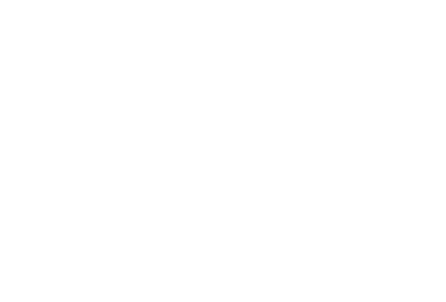

In [10]:
# init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = {
    'CLASSES': model.CLASSES,
    'PALETTE': model.PALETTE
}

In [11]:
# test a single sample
pcd = './data/kitti/000008.bin'
result, data = inference_detector(model, pcd)
points = data['inputs']['points']
data_input = dict(points=points)

In [12]:
# show the results
out_dir = './'
visualizer.add_datasample(
    'result',
    data_input,
    pred_sample=result,
    show=True,
    wait_time=0,
    out_file=out_dir,
    vis_task='det')

[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
